In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
from stepping_stone import range_expansion as re

To install run "pip install --editable ." in the directory with the setup.py file.

# A single deme (well-mixed test tube)

## Everyone is neutral

In [41]:
num_individuals=1000
numAlleles = 10
numGenerations = 1000

allele_list = np.random.randint(low=0, high=numAlleles, size=num_individuals)
ind_list = np.array([re.Individual(i) for i in allele_list])
deme = re.Deme(numAlleles, ind_list)
seed = np.random.randint(0, 2**32 -1)

sim = re.Simulate_Deme(deme, numGenerations, seed=seed, record_every_fracgen = 1)

In [42]:
sim.simulate()

In [43]:
history = np.array(sim.history)/float(num_individuals)
time = np.array(sim.fractional_generation)

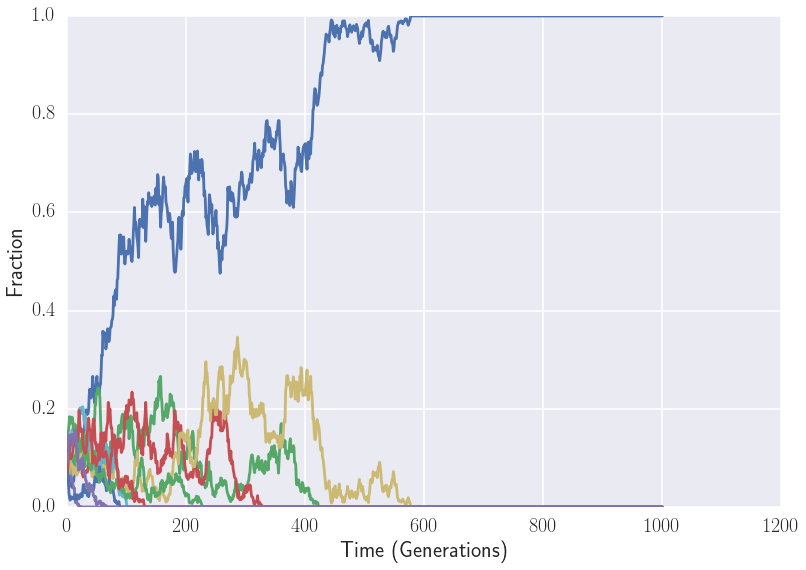

In [44]:
plt.plot(time, history)
plt.xlabel('Time (Generations)')
plt.ylabel('Fraction')

# Different growth rates

The only thing we have to change here is the type of deme.

In [66]:
num_individuals=1000
numAlleles = 10
numGenerations = 1000

allele_list = np.random.randint(low=0, high=numAlleles, size=num_individuals)
growth_rate_list = np.random.rand(num_individuals)

ind_list = np.array([re.Individual(a, s) for a, s in zip(allele_list, growth_rate_list)])
deme = re.Selection_Deme(numAlleles, ind_list)
seed = np.random.randint(0, 2**32 -1)

sim = re.Simulate_Deme(deme, numGenerations, seed=seed, record_every_fracgen = 1)

In [67]:
sim.simulate()

In [68]:
history = np.array(sim.history)/float(num_individuals)
time = np.array(sim.fractional_generation)

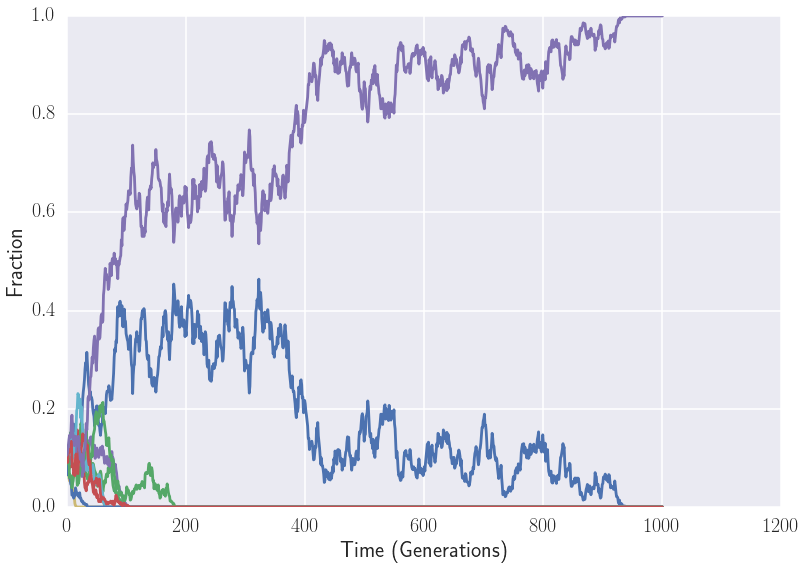

In [69]:
plt.plot(time, history)
plt.xlabel('Time (Generations)')
plt.ylabel('Fraction')

In [72]:
fit_hist = np.array(sim.fitness_history)

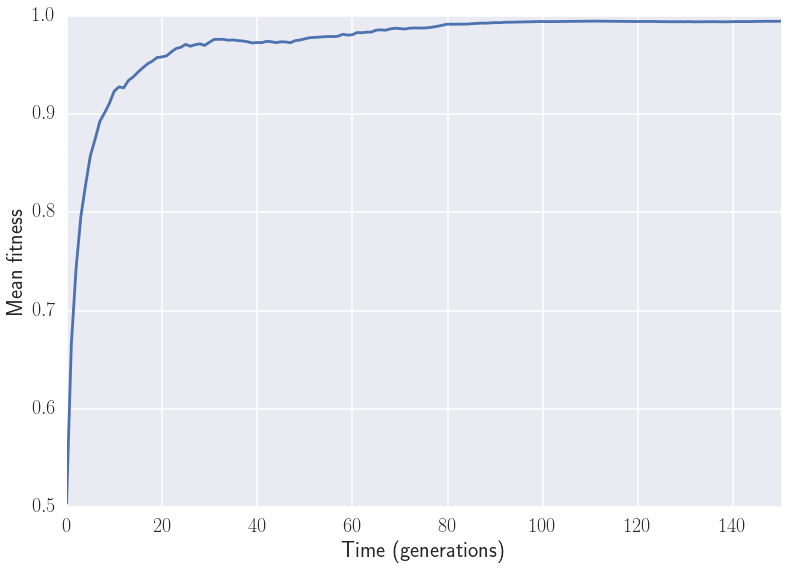

In [76]:
plt.plot(time, fit_hist.mean(axis=1))
plt.ylabel('Mean fitness')
plt.xlim(0, 150)
plt.ylim(.5, 1)
plt.xlabel('Time (generations)')

# Line of Demes (stepping stone)

## Different fitnesses

In [48]:
L = 400
num_generations= 200
num_individuals = 10
# num_alleles doesn't really mean anything when every individual has a
# different fitness...but it doesn't really matter.
num_alleles = 2 
record_every = 1.0
fraction_swap = 0.1

In [49]:
deme_list = []

for i in range(L):
    # This doesn't mean anything...doesn't effect simulation at all, just used for tracking.
    random_alleles = np.random.randint(0, num_alleles, size=num_individuals)
    random_fitness = np.random.rand(num_individuals)
    ind_list = np.array([re.Individual(allele_id=z, growth_rate=g) for z, g in zip(random_alleles, random_fitness)])
    deme = re.Selection_Deme(num_alleles, ind_list)
    deme_list.append(deme)

In [50]:
deme_list = np.array(deme_list, dtype=re.Deme)

seed = np.random.randint(0, 2**32 -1)

sim = re.Simulate_Deme_Line(deme_list, num_alleles, num_generations=num_generations, seed=seed,
                            record_every = record_every, fraction_swap = fraction_swap)

sim.simulate()

In [51]:
fitness_history = sim.get_fitness_history()
times = np.asarray(sim.frac_gen)
deme_index = np.arange(L)

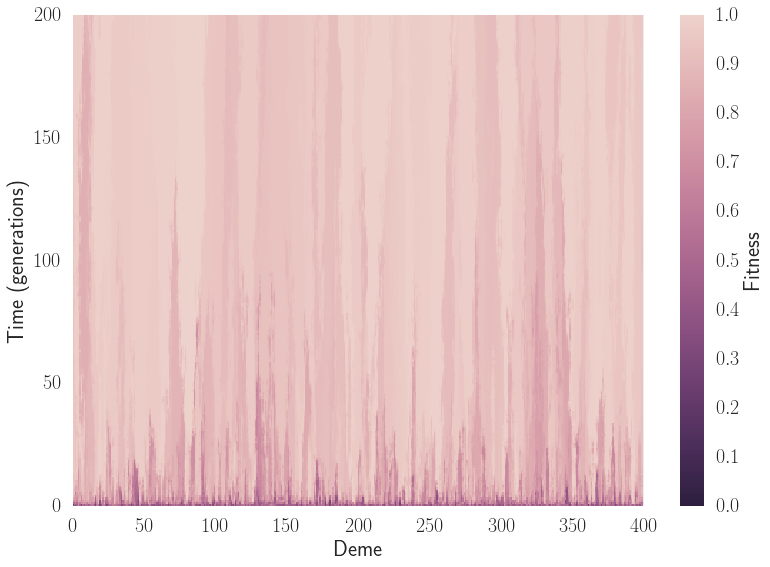

In [52]:
cmap = sns.cubehelix_palette(n_colors=2048, as_cmap=True, reverse=True)

plt.pcolormesh(deme_index, times, fitness_history, cmap=cmap)
plt.xlabel('Deme')
plt.ylabel('Time (generations)')

cb = plt.colorbar()
cb.set_label('Fitness')
plt.clim(0, 1)

## Mutational meltdown (Muller's ratchet)

In [ ]:
L = 400
num_generations= 200
num_individuals = 10
# num_alleles doesn't really mean anything when every individual has a
# different fitness...but it doesn't really matter.
num_alleles = 2 
record_every = 1.0
fraction_swap = 0.1